In [20]:
import matplotlib.pyplot as plt
import cv2 as cv
from fer import FER
from keras.models import load_model
import numpy as np

In [3]:
model = load_model('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/DeepLearning/gender_prediction_model.keras')

In [4]:
px = plt.imread('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/images/modi.jpg')
px.shape

(1038, 1667, 3)

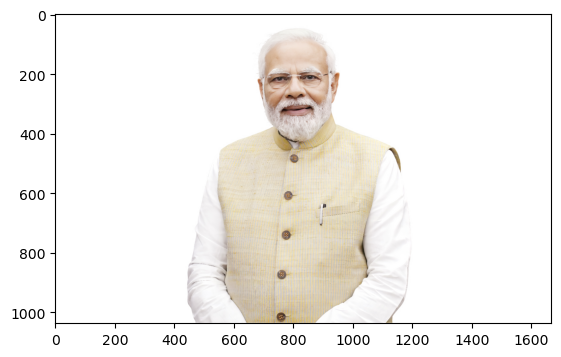

In [5]:
plt.imshow(px)
plt.show()

In [6]:
fd = FER()
fd.find_faces(px)

array([[677, 118, 256, 256]], dtype=int32)

In [7]:
fd.detect_emotions(px)

[{'box': array([677, 118, 256, 256], dtype=int32),
  'emotions': {'angry': 0.1,
   'disgust': 0.01,
   'fear': 0.6,
   'happy': 0.0,
   'sad': 0.2,
   'surprise': 0.01,
   'neutral': 0.09}}]

In [8]:
x,y,w,h = fd.find_faces(px)[0]
x,y,w,h

(677, 118, 256, 256)

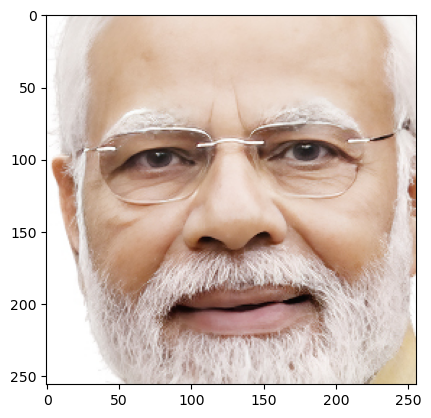

In [9]:
px_face = px[y:y+h,x:x+w]
plt.imshow(px_face)
plt.show()

In [10]:
px = px/255

In [11]:
cv.rectangle(px,(x,y),(x+w,y+h),[1,0,0],2)

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

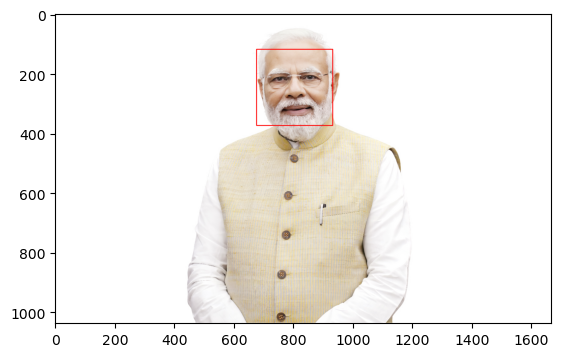

In [12]:
plt.imshow(px)
plt.show()

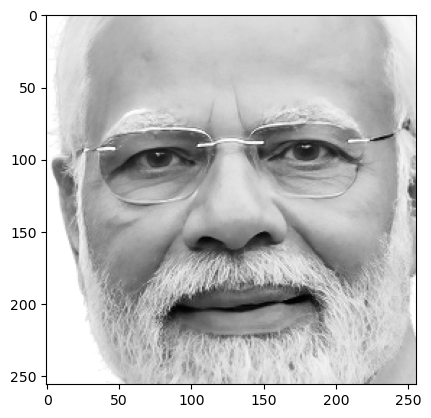

In [13]:
px_gray = cv.cvtColor(px_face,cv.COLOR_BGR2GRAY)
plt.imshow(px_gray,cmap='gray')
plt.show()

In [14]:
px_final = cv.resize(px_gray,(48,48))
px_final.shape

(48, 48)

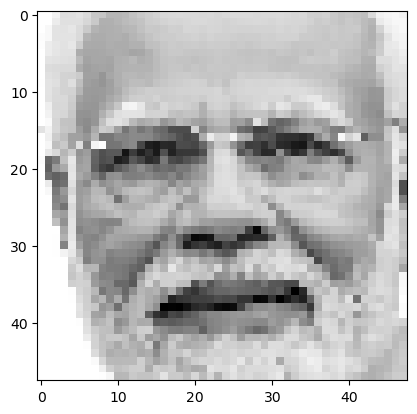

In [15]:
plt.imshow(px_final,cmap='gray')
plt.show()

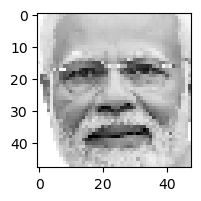

In [16]:
plt.figure(figsize=[2,2])
plt.imshow(px_final,cmap='gray')
plt.show()

In [18]:
model.predict(px_final.reshape(1,48,48))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[0.01332537, 0.9866746 ]], dtype=float32)

# Observation

98% Probability that person in the image is male

In [22]:
y_predict = np.argmax(model.predict(px_final.reshape(1,48,48))[0])
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


1

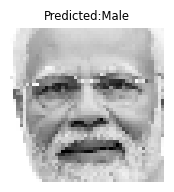

In [23]:
genders = ['Female','Male']
plt.figure(figsize=[2,2])
plt.imshow(px_final,cmap='gray')
plt.axis(False)
plt.title(f'Predicted:{genders[y_predict]}',fontsize='small')
plt.show()

# ALL STEPS IN SINGLE CELL

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


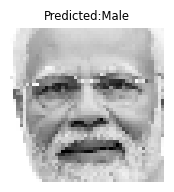

In [25]:
px = plt.imread('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/images/modi.jpg')
x,y,w,h = fd.find_faces(px)[0] # Face Detection
px_face = px[y:y+h,x:x+w] # Face Slicing
px_gray = cv.cvtColor(px_face,cv.COLOR_BGR2GRAY) # Convert to Gray Scale
px_final = cv.resize(px_gray,(48,48)) #resize to 48 x 48
model = load_model('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/DeepLearning/gender_prediction_model.keras')
y_predict = np.argmax(model.predict(px_final.reshape(1,48,48))[0])
plt.figure(figsize=[2,2])
plt.imshow(px_final,cmap='gray')
plt.axis(False)
plt.title(f'Predicted:{genders[y_predict]}',fontsize='small')
plt.show()

In [ ]:
Model is correctly predicting the perso